# Random Forrest to Check for Overfitted

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
nba_data = pd.read_csv('NBA_2018-2019.csv')

In [3]:
nba_data = nba_data.drop(['Tm',  'OWS', 'DWS', 'WS/48'], axis=1)
# Tm and Pos are catergorical variables and doesn't matter for the objective
# OWS, DWS, and WS/48 are part of the equation for WS. So it would be pointless. 

In [4]:
nba_data.isnull().sum()*100/nba_data.isnull().count()

Player    0.000000
Age       0.000000
G         0.000000
MP        0.000000
PER       0.000000
TS%       0.847458
3PAr      0.847458
FTr       0.847458
ORB%      0.000000
DRB%      0.000000
TRB%      0.000000
AST%      0.000000
STL%      0.000000
BLK%      0.000000
TOV%      0.847458
USG%      0.000000
WS        0.000000
OBPM      0.000000
DBPM      0.000000
BPM       0.000000
VORP      0.000000
dtype: float64

In [5]:
nba_data["TS%"].fillna(0, inplace =True)
nba_data["3PAr"].fillna(0, inplace =True)
nba_data["FTr"].fillna(0, inplace =True)
nba_data["TOV%"].fillna(0, inplace =True)
# Filled in the null with 0 since it's less than 1% null.

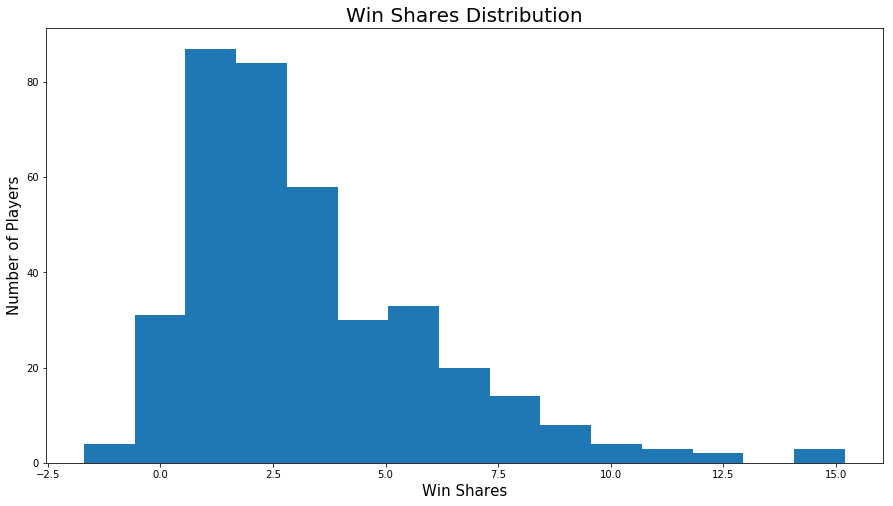

In [6]:
# There are  alot of players that have 0 WS. 
#There are 15 players in each team and need to filter out players that don't play much

nba_data = nba_data[nba_data['G'] > 41]

plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

# Filter players that has played more than 41 games. So the players that don't played much are filtered out. 
# The WS distribution is normalized compared to the last one. 

In [9]:
# Y is the target variable, in other words what are trying to predict.
Y = nba_data['WS']

# X is the feature set we are using to predict the WS
X = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 7)
# Testing 50% and training 50%
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 190
The number of observations in test set is 191


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print('Score: %.3f' % rf.score(X_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_rf))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_rf))
print('Variance score: %.3f' % r2_score(y_test, y_rf))

Score: 0.988
Mean squared error: 0.689
Mean Absolute error: 0.567
Variance score: 0.902


In [14]:
ws = nba_data[['Player', 'WS']]

In [19]:
ws.sort_values('WS', ascending=False).head(10)

,Player,WS
267,James Harden,15.2
19,Giannis Antetokounmpo,14.4
244,Rudy Gobert,14.4
401,Damian Lillard,12.1
240,Paul George,11.9
353,Nikola Joki?,11.8
191,Kevin Durant,11.5
112,Clint Capela,10.8
647,Karl-Anthony Towns,10.4
661,Nikola Vu?evi?,10.1


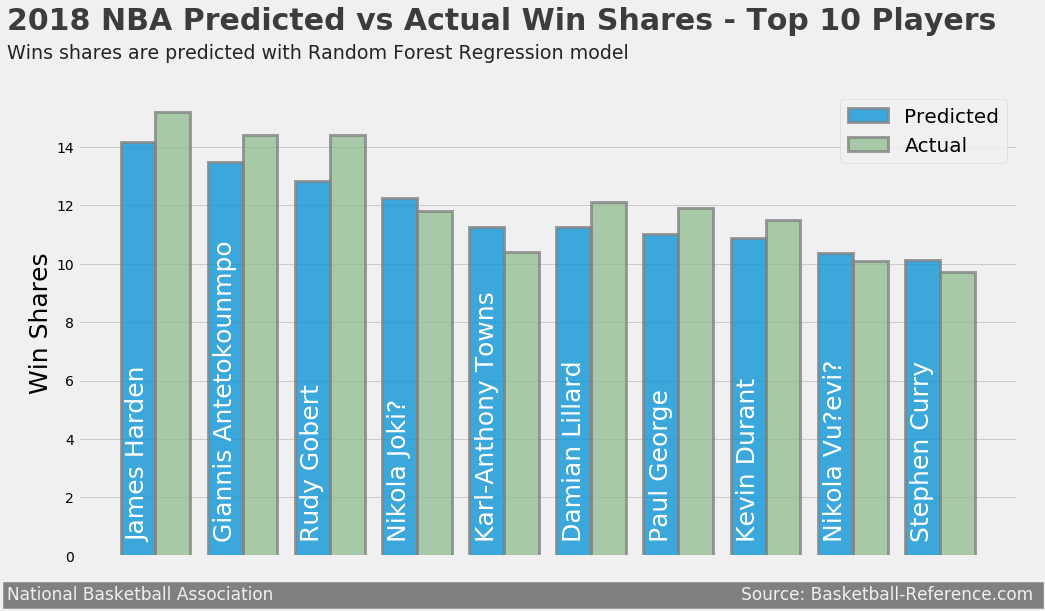

In [30]:
rf_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

rf_pred = rf.predict(rf_new)

rf_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(rf_pred, rf_names):
    a.append({'WS_pred':i,'Player':j})

rf_wins = pd.DataFrame(a)
rf_wins['WS_pred'] = round(rf_wins['WS_pred'].astype(float),2)

rf_wins = rf_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
rf_wins = rf_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(rf_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, rf_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, rf_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = rf_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Random Forest Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

In [21]:
rf_wins

,Player,WS_pred,WS
0,James Harden,13.46,15.2
1,Damian Lillard,11.75,12.1
2,Paul George,11.55,11.9
3,Nikola Joki?,11.28,11.8
4,Giannis Antetokounmpo,11.01,14.4
5,Nikola Vu?evi?,10.97,10.1
6,Kevin Durant,10.92,11.5
7,Karl-Anthony Towns,10.56,10.4
8,Rudy Gobert,10.40,14.4
9,Anthony Davis,9.90,9.5


In [22]:
# Y is the target variable, in other words what are trying to predict.
Y = nba_data['WS']

# X is the feature set we are using to predict the WS
X = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.9, random_state = 7)
# Testing 90% and training 10%
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 38
The number of observations in test set is 343


In [23]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print('Score: %.3f' % rf.score(X_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_rf))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_rf))
print('Variance score: %.3f' % r2_score(y_test, y_rf))

Score: 0.975
Mean squared error: 1.020
Mean Absolute error: 0.713
Variance score: 0.863


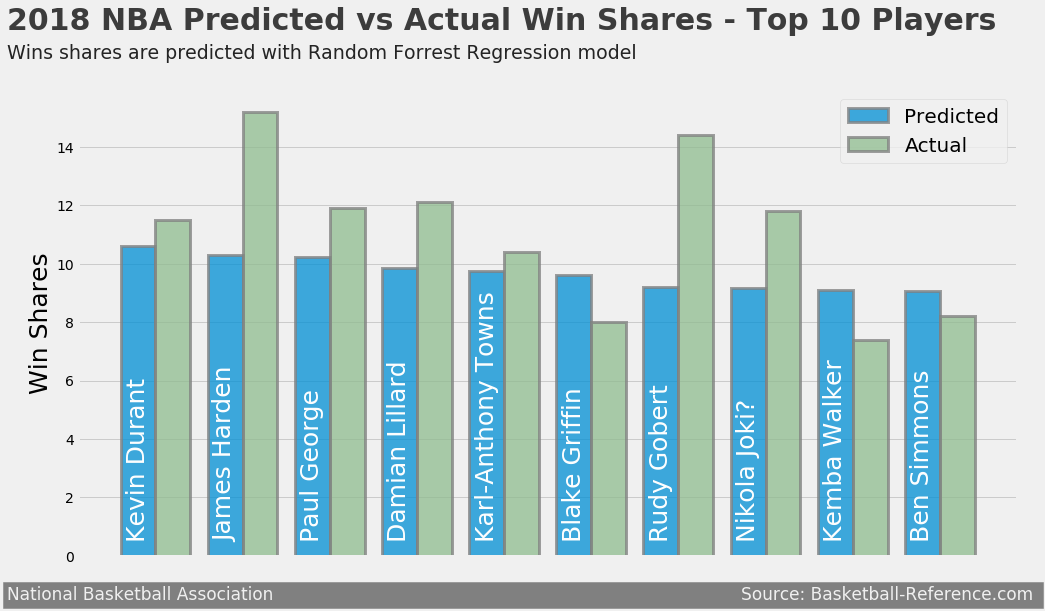

In [24]:
rf_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

rf_pred = rf.predict(rf_new)

rf_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(rf_pred, rf_names):
    a.append({'WS_pred':i,'Player':j})

rf_wins = pd.DataFrame(a)
rf_wins['WS_pred'] = round(rf_wins['WS_pred'].astype(float),2)

rf_wins = rf_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
rf_wins = rf_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(rf_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, rf_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, rf_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = rf_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Random Forrest Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

In [25]:
rf_wins

,Player,WS_pred,WS
0,Kevin Durant,10.61,11.5
1,James Harden,10.31,15.2
2,Paul George,10.24,11.9
3,Damian Lillard,9.84,12.1
4,Karl-Anthony Towns,9.75,10.4
5,Blake Griffin,9.61,8.0
6,Rudy Gobert,9.21,14.4
7,Nikola Joki?,9.16,11.8
8,Kemba Walker,9.09,7.4
9,Ben Simmons,9.06,8.2


In [26]:
# Y is the target variable, in other words what are trying to predict.
Y = nba_data['WS']

# X is the feature set we are using to predict the WS
X = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 7)
# Testing 10% and training 90%
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 342
The number of observations in test set is 39


In [27]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print('Score: %.3f' % rf.score(X_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_rf))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_rf))
print('Variance score: %.3f' % r2_score(y_test, y_rf))

Score: 0.989
Mean squared error: 0.319
Mean Absolute error: 0.471
Variance score: 0.940


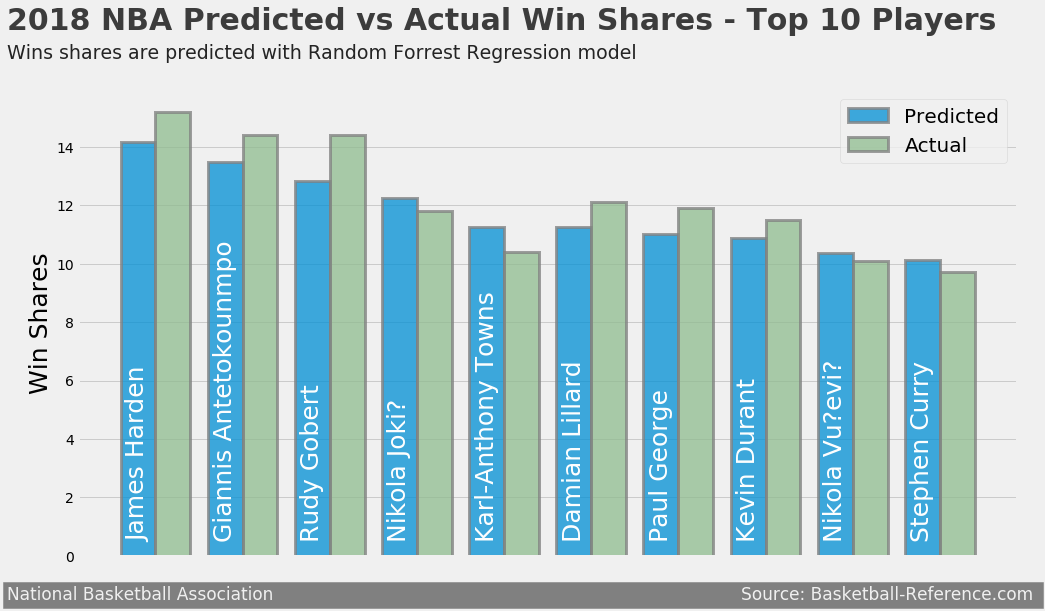

In [28]:
rf_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

rf_pred = rf.predict(rf_new)

rf_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(rf_pred, rf_names):
    a.append({'WS_pred':i,'Player':j})

rf_wins = pd.DataFrame(a)
rf_wins['WS_pred'] = round(rf_wins['WS_pred'].astype(float),2)

rf_wins = rf_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
rf_wins = rf_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(rf_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, rf_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, rf_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = rf_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Random Forrest Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

In [29]:
rf_wins

,Player,WS_pred,WS
0,James Harden,14.15,15.2
1,Giannis Antetokounmpo,13.47,14.4
2,Rudy Gobert,12.81,14.4
3,Nikola Joki?,12.26,11.8
4,Karl-Anthony Towns,11.25,10.4
5,Damian Lillard,11.25,12.1
6,Paul George,11.03,11.9
7,Kevin Durant,10.87,11.5
8,Nikola Vu?evi?,10.37,10.1
9,Stephen Curry,10.11,9.7
